In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-16/18-00-52/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. no: 0.4871
	2. round: 0.4181
	3. circular: 0.3649
	4. outline: 0.3350
	5. is: 0.2615
	6. form: 0.1608
	7. up: 0.1602
	8. fix: 0.1588
	9. have: 0.1478
	10. angle: 0.1420
	11. static: 0.1370
	12. figure: 0.1367
	13. with: 0.1255
	14. transparent: 0.1248
	15. scarlet: 0.1221
	16. left: 0.1177
	17. position: 0.1134
	18. canvas: 0.1122
	19. this: 0.1088
	20. photo: 0.1079
	21. turn: 0.1067
	22. <pad>: 0.1000
	23. bottom: 0.0852
	24. rotate: 0.0758
	25. blank: 0.0750
	26. four: 0.0648
	27. picture: 0.0644
	28. in: 0.0632
	29. image: 0.0618
	30. lime: 0.0557
	31. right: 0.0535
	32. azure: 0.0522
	33. white: 0.0517
	34. cyan: 0.0517
	35. shape: 0.0513
	36. green: 0.0476
	37. blue: 0.0461
	38. quadratic: 0.0449
	39. unrotate: 0.0400
	40. corner: 0.0382
	41. the: 0.0358
	42. locate: 0.0357
	43. crimson: 0.0353
	44. olive: 0.0349
	45. solid: 0.0344
	46. shade: 0.0306
	47. unturn: 0.0305
	48. color: 0.0276
	49. red: 0.0242
	50. <d0>: 0.0

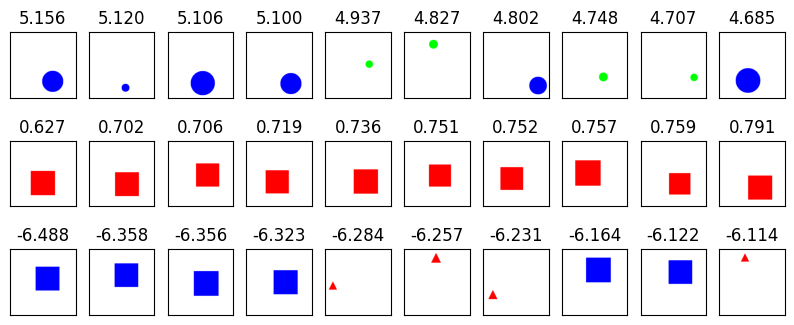

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. olive: 0.3951
	2. green: 0.3758
	3. lime: 0.3552
	4. cyan: 0.3448
	5. color: 0.3413
	6. blue: 0.3215
	7. rotate: 0.3127
	8. azure: 0.2971
	9. locate: 0.2893
	10. unrotate: 0.2687
	11. unturn: 0.2630
	12. corner: 0.2627
	13. white: 0.2444
	14. blank: 0.2237
	15. fix: 0.2225
	16. that: 0.2049
	17. turn: 0.2045
	18. picture: 0.1993
	19. the: 0.1924
	20. solid: 0.1817
	21. photo: 0.1732
	22. transparent: 0.1717
	23. canvas: 0.1707
	24. in: 0.1649
	25. background: 0.1631
	26. right: 0.1499
	27. shade: 0.1332
	28. red: 0.1312
	29. up: 0.1274
	30. this: 0.1257
	31. figure: 0.1167
	32. have: 0.1030
	33. <pad>: 0.1000
	34. with: 0.0964
	35. static: 0.0917
	36. image: 0.0913
	37. crimson: 0.0856
	38. <d1>: 0.0671
	39. scarlet: 0.0666
	40. three: 0.0655
	41. angle: 0.0632
	42. left: 0.0617
	43. form: 0.0596
	44. posit

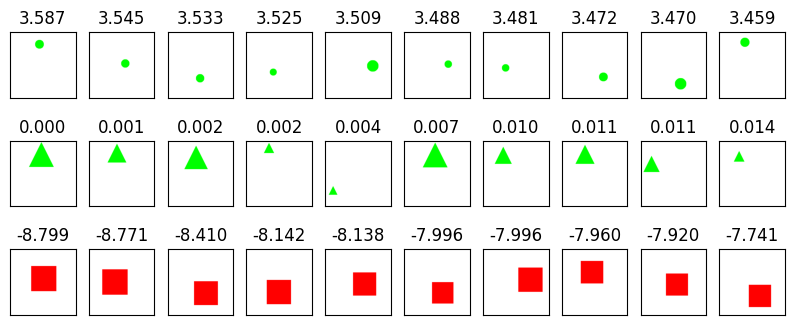

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. background: 0.4230
	2. unrotate: 0.3460
	3. that: 0.3457
	4. olive: 0.3005
	5. the: 0.2990
	6. locate: 0.2741
	7. unturn: 0.2446
	8. white: 0.2362
	9. solid: 0.2324
	10. lime: 0.2303
	11. green: 0.2270
	12. shade: 0.1973
	13. red: 0.1955
	14. rotate: 0.1895
	15. in: 0.1857
	16. blank: 0.1672
	17. right: 0.1656
	18. azure: 0.1648
	19. crimson: 0.1628
	20. color: 0.1615
	21. picture: 0.1573
	22. <d2>: 0.1535
	23. cyan: 0.1491
	24. corner: 0.1422
	25. blue: 0.1363
	26. this: 0.1335
	27. scarlet: 0.1299
	28. canvas: 0.1150
	29. turn: 0.1149
	30. transparent: 0.1087
	31. fix: 0.1040
	32. <pad>: 0.1000
	33. up: 0.0915
	34. three: 0.0890
	35. figure: 0.0869
	36. bottom: 0.0851
	37. photo: 0.0850
	38. static: 0.0816
	39. image: 0.0690
	40. have: 0.0657
	41. shape: 0.0570
	42. with: 0.0542
	43. left: 0.0534
	44. pos

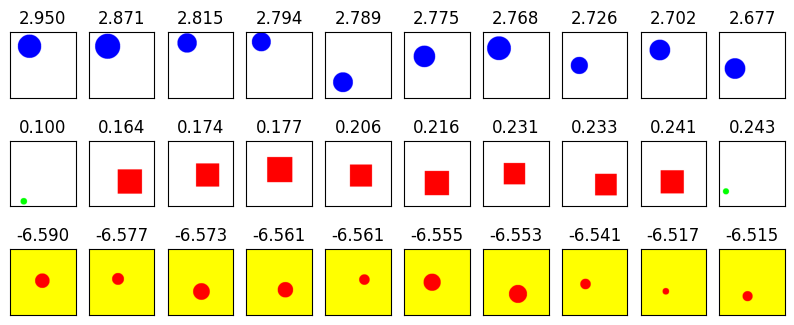

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. corner: 0.2143
	2. azure: 0.1880
	3. blue: 0.1776
	4. color: 0.1712
	5. angle: 0.1627
	6. cyan: 0.1608
	7. have: 0.1521
	8. turn: 0.1499
	9. with: 0.1425
	10. photo: 0.1424
	11. lime: 0.1375
	12. green: 0.1359
	13. image: 0.1356
	14. solid: 0.1319
	15. unturn: 0.1309
	16. figure: 0.1293
	17. locate: 0.1245
	18. blank: 0.1225
	19. up: 0.1177
	20. form: 0.1165
	21. fix: 0.1156
	22. is: 0.1148
	23. picture: 0.1125
	24. shade: 0.1102
	25. canvas: 0.1099
	26. static: 0.1084
	27. olive: 0.1069
	28. rotate: 0.1046
	29. <pad>: 0.1000
	30. in: 0.0996
	31. unrotate: 0.0962
	32. red: 0.0933
	33. <d3>: 0.0916
	34. this: 0.0892
	35. the: 0.0850
	36. triangular: 0.0826
	37. position: 0.0813
	38. transparent: 0.0802
	39. bottom: 0.0795
	40. outline: 0.0773
	41. left: 0.0773
	42. white: 0.0736
	43. three: 0.0719
	44. that:

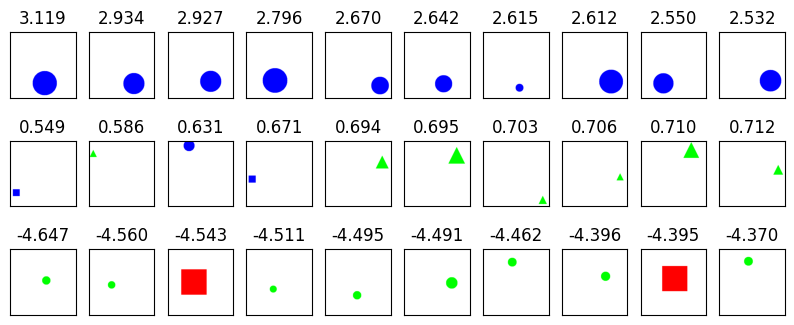

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. crimson: 0.1510
	2. quadratic: 0.1450
	3. scarlet: 0.1410
	4. four: 0.1329
	5. bottom: 0.1193
	6. right: 0.1136
	7. red: 0.1078
	8. background: 0.1054
	9. shape: 0.1051
	10. <pad>: 0.1000
	11. the: 0.0997
	12. position: 0.0997
	13. left: 0.0970
	14. shade: 0.0952
	15. in: 0.0917
	16. that: 0.0888
	17. static: 0.0861
	18. this: 0.0822
	19. picture: 0.0819
	20. white: 0.0769
	21. transparent: 0.0763
	22. figure: 0.0739
	23. form: 0.0738
	24. <d4>: 0.0729
	25. up: 0.0681
	26. with: 0.0674
	27. canvas: 0.0663
	28. solid: 0.0656
	29. blank: 0.0655
	30. image: 0.0649
	31. have: 0.0610
	32. photo: 0.0590
	33. turn: 0.0528
	34. unrotate: 0.0521
	35. rotate: 0.0513
	36. unturn: 0.0512
	37. angle: 0.0470
	38. locate: 0.0468
	39. fix: 0.0453
	40. three: 0.0428
	41. is: 0.0392
	42. outline: 0.0390
	43. color: 0.0374
	4

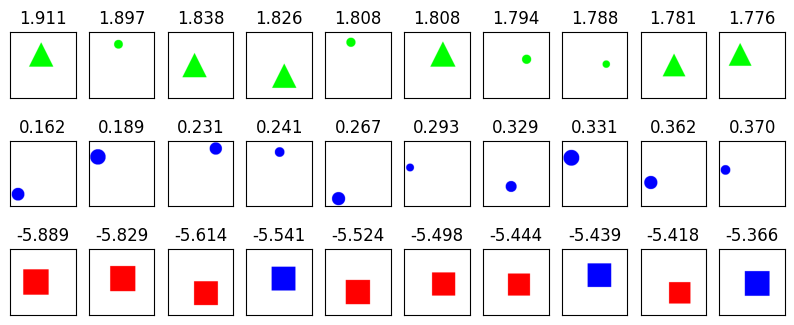

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. image: 0.1872
	2. triangular: 0.1858
	3. angle: 0.1755
	4. three: 0.1608
	5. with: 0.1480
	6. corner: 0.1465
	7. blue: 0.1419
	8. azure: 0.1411
	9. bottom: 0.1390
	10. solid: 0.1340
	11. cyan: 0.1305
	12. shade: 0.1302
	13. static: 0.1218
	14. red: 0.1209
	15. turn: 0.1195
	16. picture: 0.1182
	17. crimson: 0.1176
	18. unturn: 0.1142
	19. form: 0.1129
	20. have: 0.1117
	21. figure: 0.1090
	22. position: 0.1076
	23. color: 0.1050
	24. outline: 0.1043
	25. up: 0.1039
	26. photo: 0.1025
	27. <pad>: 0.1000
	28. scarlet: 0.0972
	29. locate: 0.0966
	30. quadratic: 0.0911
	31. left: 0.0903
	32. is: 0.0861
	33. in: 0.0809
	34. blank: 0.0807
	35. four: 0.0793
	36. fix: 0.0791
	37. unrotate: 0.0773
	38. canvas: 0.0754
	39. the: 0.0754
	40. lime: 0.0748
	41. rotate: 0.0729
	42. transparent: 0.0692
	43. this: 0.0622
	4

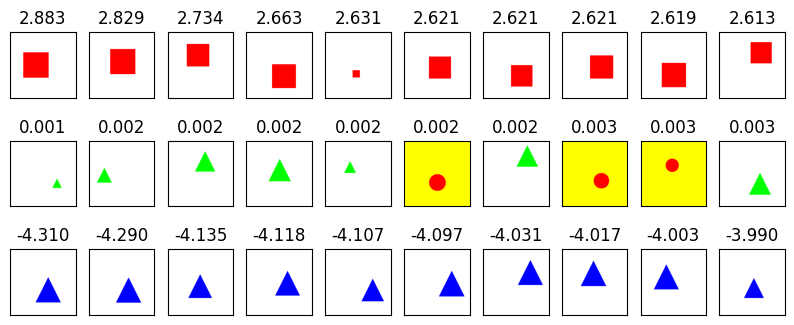

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. circular: 0.3619
	2. no: 0.3493
	3. round: 0.3389
	4. transparent: 0.1631
	5. outline: 0.1562
	6. fix: 0.1506
	7. is: 0.1251
	8. up: 0.1143
	9. right: 0.1120
	10. left: 0.1117
	11. position: 0.1011
	12. <pad>: 0.1000
	13. canvas: 0.0992
	14. white: 0.0936
	15. rotate: 0.0889
	16. figure: 0.0887
	17. photo: 0.0886
	18. turn: 0.0848
	19. scarlet: 0.0808
	20. this: 0.0806
	21. form: 0.0789
	22. static: 0.0786
	23. have: 0.0785
	24. blank: 0.0754
	25. with: 0.0744
	26. <d6>: 0.0665
	27. in: 0.0646
	28. shape: 0.0572
	29. picture: 0.0538
	30. bottom: 0.0535
	31. angle: 0.0516
	32. four: 0.0500
	33. lime: 0.0433
	34. the: 0.0404
	35. green: 0.0347
	36. image: 0.0323
	37. crimson: 0.0305
	38. olive: 0.0278
	39. unrotate: 0.0277
	40. quadratic: 0.0260
	41. cyan: 0.0255
	42. color: 0.0242
	43. blue: 0.0210
	44. loca

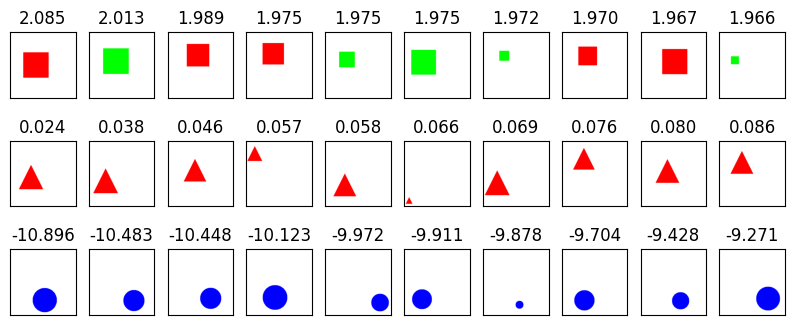

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. shape: 0.1838
	2. four: 0.1683
	3. is: 0.1534
	4. circular: 0.1453
	5. left: 0.1245
	6. position: 0.1233
	7. quadratic: 0.1098
	8. outline: 0.1086
	9. scarlet: 0.1056
	10. <pad>: 0.1000
	11. form: 0.0932
	12. round: 0.0926
	13. this: 0.0873
	14. have: 0.0856
	15. bottom: 0.0821
	16. figure: 0.0791
	17. static: 0.0738
	18. in: 0.0737
	19. up: 0.0728
	20. right: 0.0722
	21. transparent: 0.0627
	22. canvas: 0.0600
	23. white: 0.0578
	24. with: 0.0554
	25. photo: 0.0533
	26. no: 0.0508
	27. blank: 0.0493
	28. angle: 0.0459
	29. fix: 0.0455
	30. turn: 0.0411
	31. <d7>: 0.0401
	32. the: 0.0400
	33. crimson: 0.0383
	34. rotate: 0.0270
	35. picture: 0.0248
	36. image: 0.0230
	37. background: 0.0227
	38. red: 0.0210
	39. shade: 0.0208
	40. that: 0.0173
	41. unrotate: 0.0166
	42. lime: 0.0146
	43. green: 0.0140
	44. 

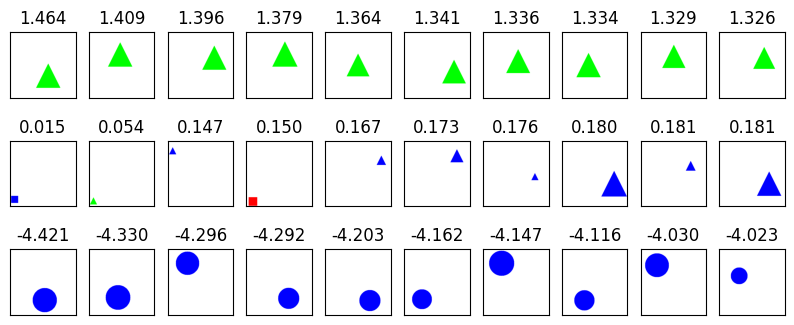

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. shape: 0.4136
	2. four: 0.2434
	3. quadratic: 0.2312
	4. right: 0.1932
	5. this: 0.1927
	6. left: 0.1639
	7. form: 0.1536
	8. canvas: 0.1442
	9. position: 0.1251
	10. that: 0.1242
	11. <d8>: 0.1184
	12. photo: 0.1124
	13. have: 0.1108
	14. in: 0.1069
	15. <pad>: 0.1000
	16. transparent: 0.0953
	17. red: 0.0937
	18. is: 0.0922
	19. figure: 0.0912
	20. static: 0.0897
	21. blank: 0.0881
	22. white: 0.0843
	23. crimson: 0.0838
	24. shade: 0.0803
	25. with: 0.0741
	26. background: 0.0681
	27. scarlet: 0.0655
	28. angle: 0.0650
	29. picture: 0.0648
	30. the: 0.0642
	31. up: 0.0612
	32. green: 0.0557
	33. bottom: 0.0483
	34. color: 0.0428
	35. fix: 0.0341
	36. rotate: 0.0326
	37. solid: 0.0319
	38. turn: 0.0305
	39. image: 0.0295
	40. locate: 0.0261
	41. outline: 0.0242
	42. unturn: 0.0235
	43. corner: 0.0233
	44.

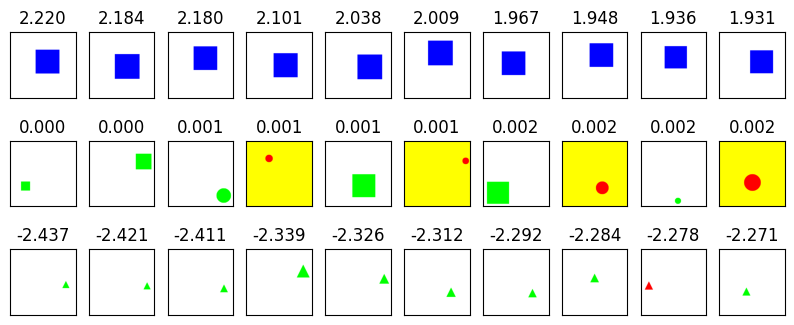

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. triangular: 0.6363
	2. three: 0.5519
	3. <d9>: 0.3441
	4. image: 0.3053
	5. quadratic: 0.2818
	6. bottom: 0.2552
	7. crimson: 0.2286
	8. angle: 0.2195
	9. red: 0.1945
	10. shade: 0.1848
	11. with: 0.1619
	12. solid: 0.1591
	13. four: 0.1462
	14. position: 0.1458
	15. static: 0.1313
	16. scarlet: 0.1298
	17. picture: 0.1230
	18. corner: 0.1221
	19. outline: 0.1189
	20. blue: 0.1188
	21. unturn: 0.1132
	22. azure: 0.1112
	23. form: 0.1066
	24. cyan: 0.1048
	25. left: 0.1025
	26. <pad>: 0.1000
	27. turn: 0.0955
	28. figure: 0.0886
	29. have: 0.0838
	30. up: 0.0830
	31. color: 0.0798
	32. locate: 0.0786
	33. photo: 0.0757
	34. background: 0.0728
	35. in: 0.0687
	36. the: 0.0681
	37. is: 0.0628
	38. unrotate: 0.0605
	39. that: 0.0542
	40. blank: 0.0525
	41. transparent: 0.0482
	42. canvas: 0.0471
	43. rotate: 0

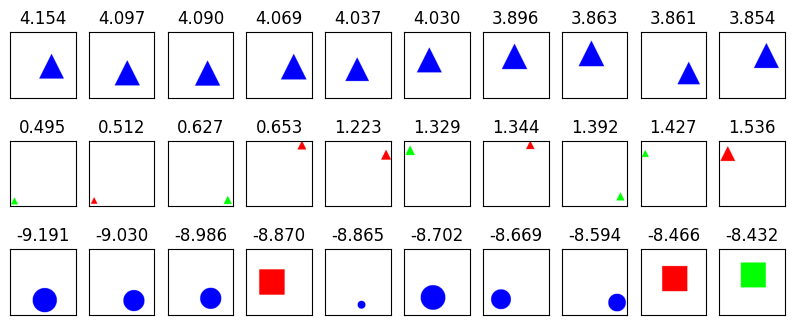

------------------------------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)